# 0. Setup

In [1]:
import sys
import os
sys.path.append(os.path.join('../src'))
from utils import *

import seaborn as sns
import glob
from IPython.display import SVG, display

/Users/frederikespersenknudsen/opt/anaconda3/envs/q4b/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
# Initalizing directory for plots
plotdir = '../plots/4hw3'
os.makedirs(plotdir, exist_ok=True)

## 1. Loading trajectories

In [3]:
# Loading trajectories
mm_complex = mda.Universe('../data/4hw3/mm/system_complex.pdb', '../data/4hw3/mm/complex_l1.xtc')
mm_solvent = mda.Universe('../data/4hw3/mm/system_solvent.pdb', '../data/4hw3/mm/solvent_l1.xtc')
ml_complex = mda.Universe('../data/4hw3/ml/model_complex_shrunk_AL10.pdb', '../data/4hw3/ml/model_complex_shrunk_AL10.xtc')
ml_solvent = mda.Universe('../data/4hw3/ml/model_solvent_AL10.pdb', '../data/4hw3/ml/model_solvent_AL10.xtc')

## 2. Ligand rotamer distributions

Due to an abundance of planar aromatic systems, only a few dihedrals actually possess flexibility in the ligand. I.e. the acid group and the five bonds of the flexible linker.

These are:
- $C_{AV}$ - $C_{AW}$ - $C_{AQ}$ - $O_{AD}$ : The rotation of the acid group
- $C_{AW}$ - $C_{AV}$ - $C_{AN}$ - $C_{AL}$ : The first dihedral in the flexible linker starting from the benzothiopene
- $C_{AV}$ - $C_{AN}$ - $C_{AL}$ - $C_{AM}$ : The second dihedral in the flexible linker starting from the benzothiopene
- $C_{AN}$ - $C_{AL}$ - $C_{AM}$ - $O_{AO}$ : The third dihedral in the flexible linker starting from the benzothiopene
- $C_{AL}$ - $C_{AM}$ - $O_{AO}$ - $C_{AT}$ : The fourth dihedral in the flexible linker starting from the benzothiopene
- $C_{AM}$ - $O_{AO}$ - $C_{AT}$ - $C_{AJ}$ : The fifth dihedral in the flexible linker starting from the benzothiopene

(See image generated below for ligand atom naming convention)

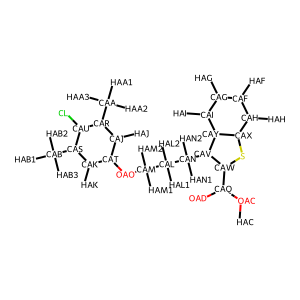

In [70]:
print_atom_names(mm_complex, 'resname 19G')

In [20]:
# Initalizing directory for ligand dihedral plots
dihdrals_plotdir = os.path.join(plotdir,'ligand_dihedrals')
os.makedirs(dihdrals_plotdir, exist_ok=True)

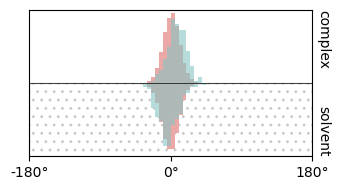

In [6]:
# Acid group
acid_dihedrals = plot_ligand_dihedral_distributions('resname 19G', ('CAV','CAW','CAQ','OAD'),
                                                    mm_complex, mm_solvent, ml_complex, ml_solvent,
                                                    atom_name_scheme='complex',
                                                    save_to=dihdrals_plotdir+'/dihedral_acid.svg')

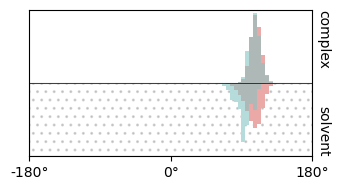

In [ ]:
# Linker 1
linker1_dihedrals = plot_ligand_dihedral_distributions('resname 19G', ('CAW','CAV','CAN','CAL'),
                                                        mm_complex, mm_solvent, ml_complex, ml_solvent,
                                                        atom_name_scheme='complex',
                                                        save_to=dihdrals_plotdir+'/dihedral_linker1.svg')

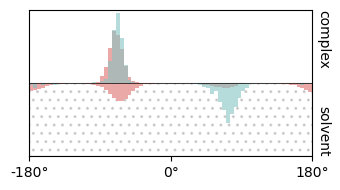

In [ ]:
# Linker 2
linker2_dihedrals = plot_ligand_dihedral_distributions('resname 19G', ('CAV','CAN','CAL','CAM'),
                                                        mm_complex, mm_solvent, ml_complex, ml_solvent,
                                                        atom_name_scheme='complex',
                                                        save_to=dihdrals_plotdir+'/dihedral_linker2.svg')

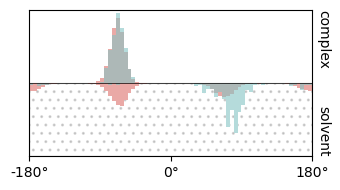

In [ ]:
# Linker 3
linker3linker1_dihedrals = _dihedrals = plot_ligand_dihedral_distributions('resname 19G', ('CAN','CAL','CAM','OAO'),
                                                    mm_complex, mm_solvent, ml_complex, ml_solvent,
                                                    atom_name_scheme='complex',
                                                    save_to=dihdrals_plotdir+'/dihedral_linker3.svg')

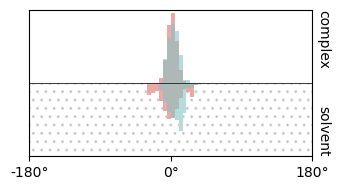

In [ ]:
# Linker 4
linker4_dihedrals = plot_ligand_dihedral_distributions('resname 19G', ('CAL','CAM','OAO','CAT'),
                                                        mm_complex, mm_solvent, ml_complex, ml_solvent,
                                                        atom_name_scheme='complex',
                                                        save_to=dihdrals_plotdir+'/dihedral_linker4.svg')

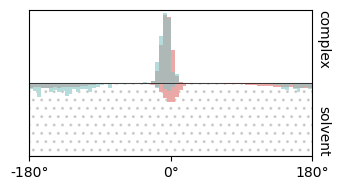

In [ ]:
# Linker 5
linker4_dihedrals = plot_ligand_dihedral_distributions('resname 19G', ('CAM','OAO','CAT','CAJ'),
                                                        mm_complex, mm_solvent, ml_complex, ml_solvent,
                                                        atom_name_scheme='complex',
                                                        save_to=dihdrals_plotdir+'/dihedral_linker5.svg')

## 3. Protein-ligand distance distributions

Based mostly on the average distance analysis and structural reasonninng, somewhat in agreement with interaction fingerprinting analysis, these candidates for protein-ligand probes are proposed:

- Acid group ($O_{1}$, $O_{2}$, $C_{12}$): ARG263
- 5-ring of benzothiopene ($C_{AV}$, $C_{AW}$, $C_{AX}$, $C_{AY}$, $S$): VAL253, THR266
- 6-ring of benzothiopene ($C_{AY}$, $C_{AI}$, $C_{AH}$, $C_{AG}$, $C_{AF}$): PHE228, MET231, PHE270
- Linker ($C_{AN}$, $C_{AL}$, $C_{AM}$, $O_{AO}$): LEU246, PHE254, LEU267
- Phenyl ($C_{AT}$, $C_{AK}$, $C_{AS}$, $C_{AU}$, $C_{AR}$, $C_{AJ}$): LEU246, MET250, PHE270
- Chloride ($Cl$): LEU235, LEU246, PHE270, VAL274, LEU290

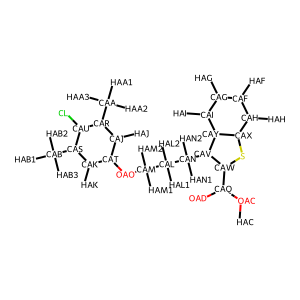

In [14]:
print_atom_names(mm_complex, 'resname 19G')

In [4]:
# Initalizing directory for distance probe plots
distance_plotdir = os.path.join(plotdir, 'distance_probes')
os.makedirs(distance_plotdir, exist_ok=True)

### 3.1 Mean distance matrices

100%|██████████| 10001/10001 [00:13<00:00, 723.16it/s]


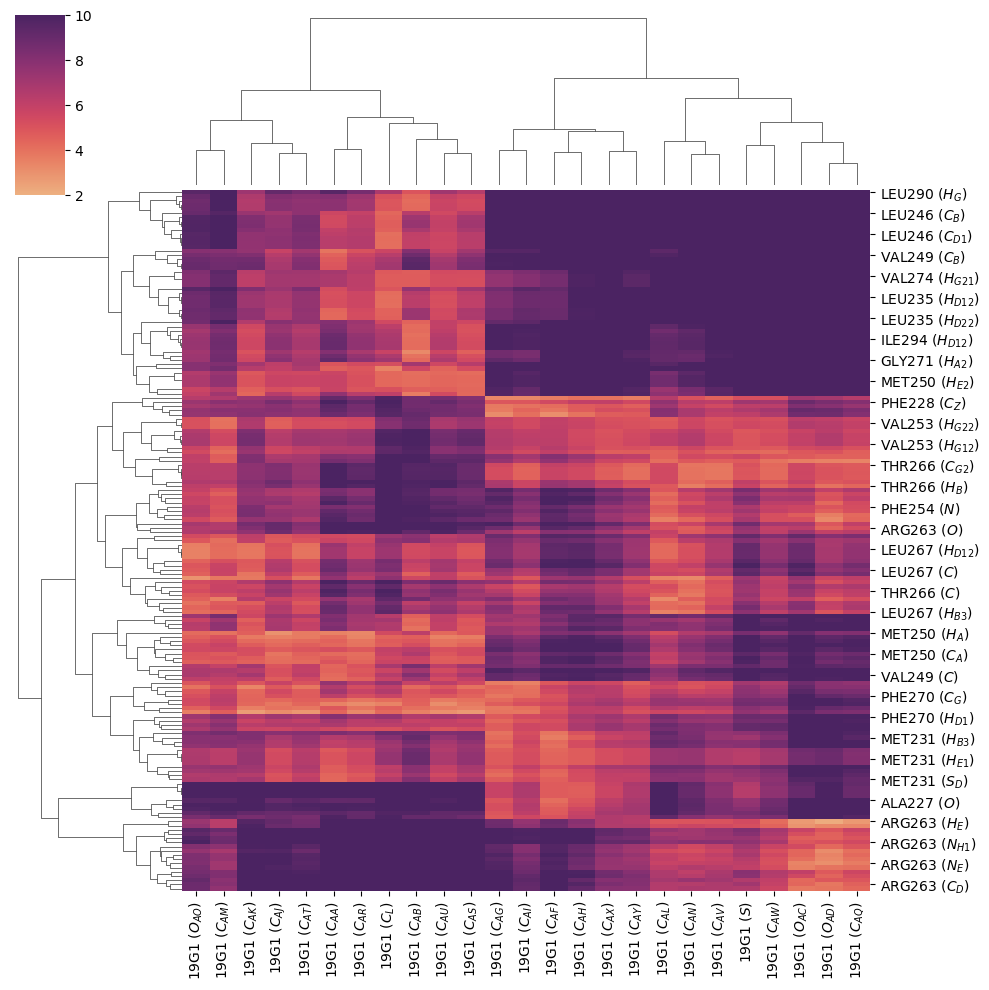

In [10]:
mm_dists = plot_distance_matrix(mm_complex,
                                "resname 19G and not element H",
                                "protein and around 5 resname 19G",
                                measure='mean', sel2_cutoff=5,
                                save_to=os.path.join(distance_plotdir, "heatmap_mm_protein_around_5_ligand_mean.svg"))

100%|██████████| 196/196 [00:00<00:00, 573.51it/s]


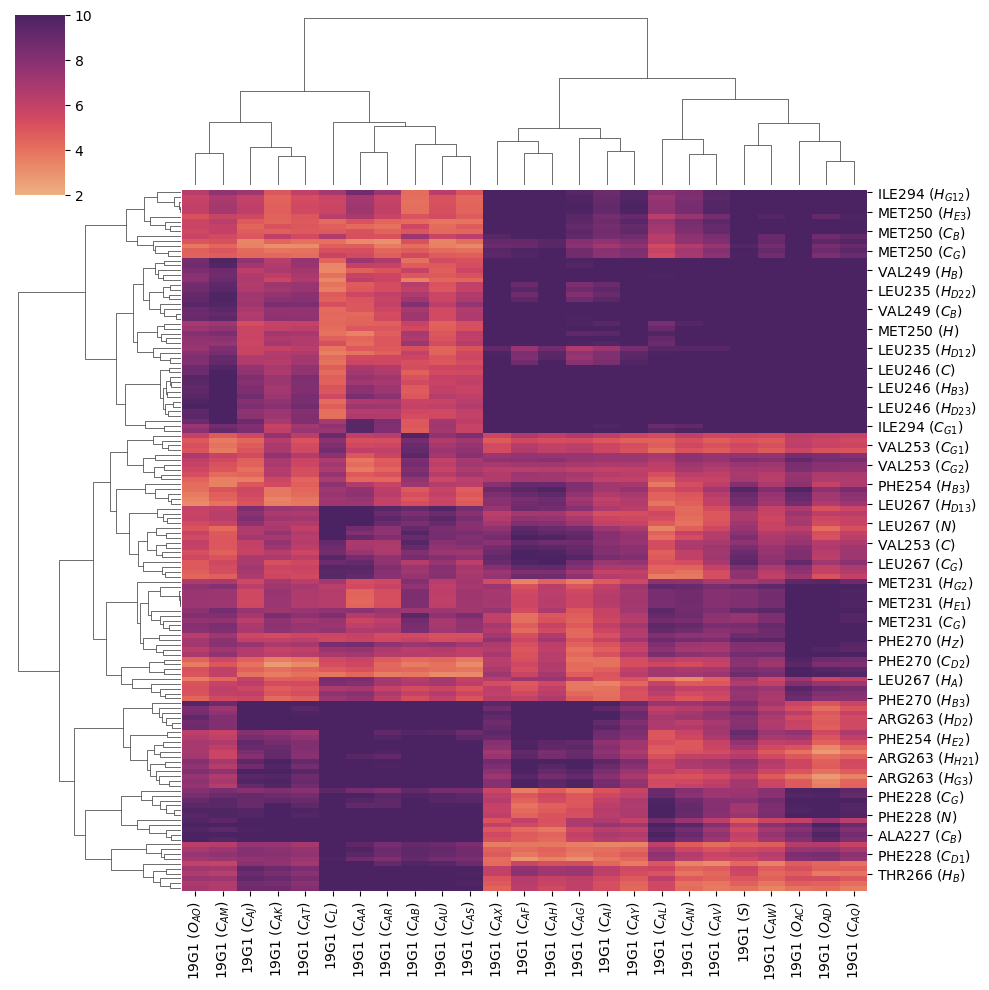

In [12]:
# Difference between MM and ML
ml_dists = plot_distance_matrix(ml_complex,
                                "resname 19G and not element H",
                                "protein and around 5 resname 19G",
                                measure='mean', sel2_cutoff=5,
                                save_to=os.path.join(distance_plotdir, "heatmap_ml_protein_around_5_ligand_mean.svg"))

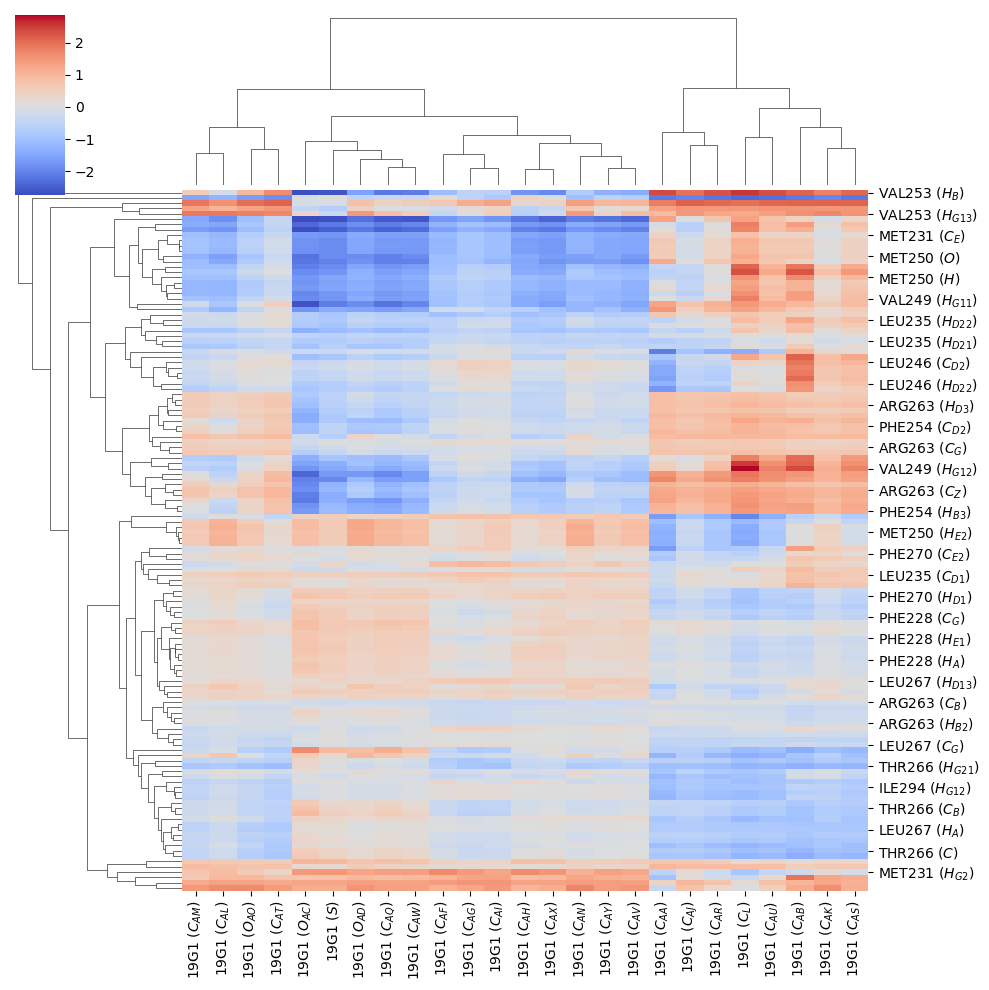

In [ ]:
# Difference between MM and ML
sns.clustermap((mm_dists - ml_dists).dropna(), cmap="coolwarm")
# Red  = ML distance shorter than MM
# Blue = ML distance longer  than MM

### 3.2 Probe exploration

Based mostly on the average distance analysis and structural reasoning. these candidates for protein-ligand probes are proposed:

- Acid group ($O_{AC}$, $O_{AD}$, $C_{AQ}$): ARG263
- 5-ring of benzothiopene ($C_{AV}$, $C_{AW}$, $C_{AX}$, $C_{AY}$, $S$): VAL253, THR266
- 6-ring of benzothiopene ($C_{AX}$, $C_{AY}$, $C_{AI}$, $C_{AH}$, $C_{AG}$, $C_{AF}$): PHE228, MET231, PHE270
- Linker ($C_{AN}$, $C_{AL}$, $C_{AM}$, $O_{AO}$): LEU246, PHE254, LEU267
- Phenoxy ring ($C_{AT}$, $C_{AK}$, $C_{AS}$, $C_{AU}$, $C_{AR}$, $C_{AJ}$): LEU246, MET250, PHE270
- Chloride ($Cl$): LEU235, LEU246, PHE270, VAL274, LEU290

In [5]:
# Setting probe candidates
distance_probes = {
    'acid':
        {'ligand_query': 'resname 19G and name OAC OAD CAQ',
         'residues': ['ARG263']},
    '5-ring_benzothiopene':
        {'ligand_query': 'resname 19G and name CAV CAW CAX CAY S',
         'residues': ['VAL253', 'THR266']},
    '6-ring_benzothiopene':
        {'ligand_query': 'resname 19G and name CAX CAY CAI CAH CAG CAF',
         'residues': ['PHE228', 'MET231', 'PHE270']},
    'linker':
        {'ligand_query': 'resname 19G and name CAN CAL CAM OAO',
         'residues': ['LEU246', 'LEU254', 'LEU267']},
    'phenoxy':
        {'ligand_query': 'resname 19G and name CAT CAK CAS CAU CAR CAJ',
         'residues': ['LEU246', 'MET250', 'PHE270']},
    'chloride':
        {'ligand_query': 'resname 19G and name CL',
         'residues': ['LEU235', 'LEU246', 'PHE270', 'VAL274', 'LEU290']},
}

In [ ]:
# Candidate probe distance distributions for substrctures and single atoms
replot = False

# Looping over all probes
for ligand_substructure in distance_probes:
    print(ligand_substructure)

    for residue in distance_probes[ligand_substructure]['residues']:
        print('\t', residue)

        # Creating directory for plots
        probe_plotdir = os.path.join(distance_plotdir, 'ligand_'+ligand_substructure, residue.lower())
        os.makedirs(probe_plotdir, exist_ok=True)

        # Plotting residue # Plotting residue substructure probes
        if f'substructure_distances_{ligand_substructure}_{residue.lower()}.svg' not in os.listdir(probe_plotdir) or replot:
            plot_residue_substructure_com_distance_distributions(
                mm_complex,
                ml_complex,
                'protein and resid ' + residue[3:].lower(),
                distance_probes[ligand_substructure]['ligand_query'],
                save_to=os.path.join(probe_plotdir, f'substructure_distances_{ligand_substructure}_{residue.lower()}.svg')
            )

        # Plotting single atom probes
        if f'single_atom_distances_{ligand_substructure}_{residue.lower()}.svg' not in os.listdir(probe_plotdir) or replot:
            plot_single_atom_distance_distributions(
                mm_complex,
                ml_complex,
                'protein and resid ' + residue[3:].lower(),
                distance_probes[ligand_substructure]['ligand_query'],
                save_to=os.path.join(probe_plotdir, f'single_atom_distances_{ligand_substructure}_{residue.lower()}.svg')
            )

CHLORIDE


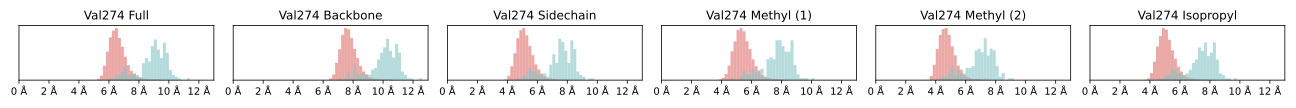

CHLORIDE


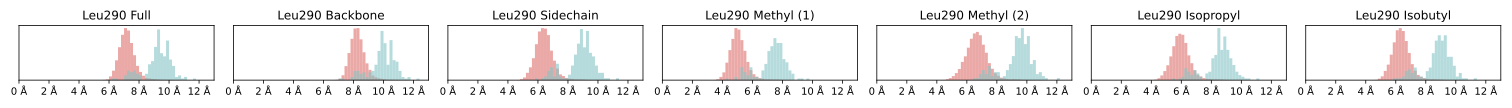

CHLORIDE


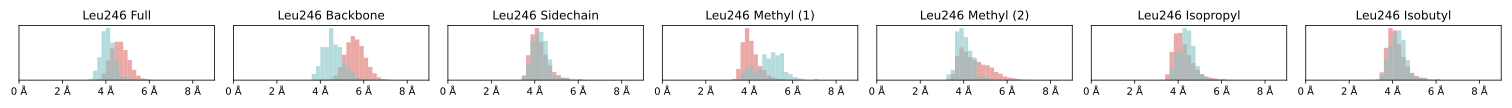

CHLORIDE


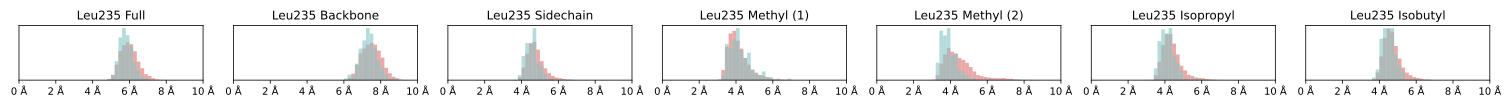

CHLORIDE


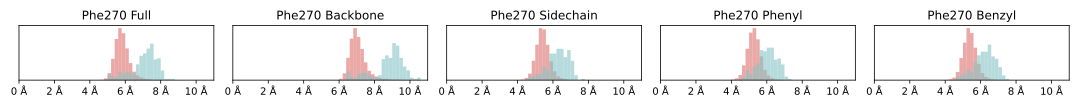

LINKER


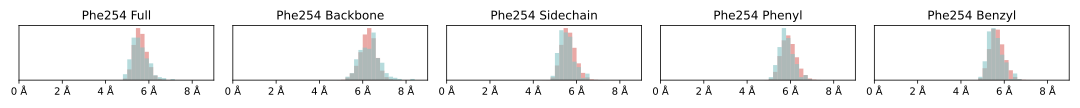

LINKER


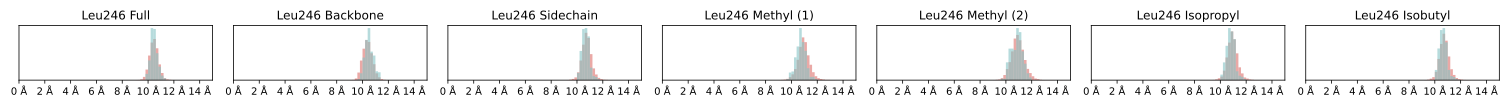

LINKER


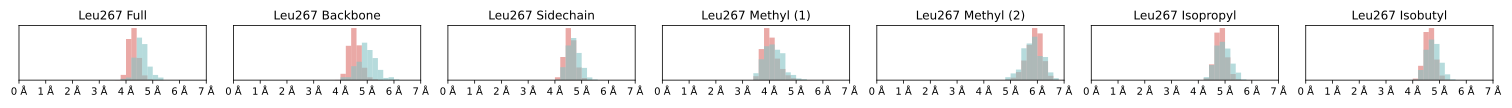

ACID


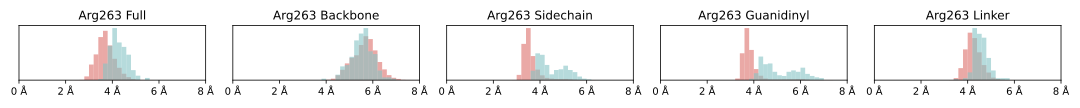

6-RING


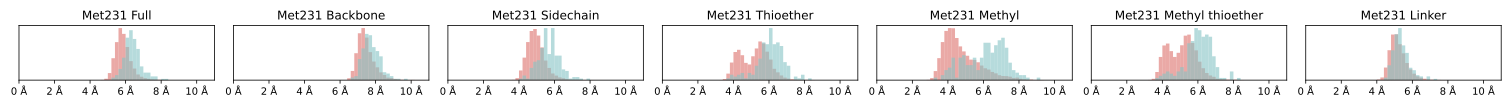

6-RING


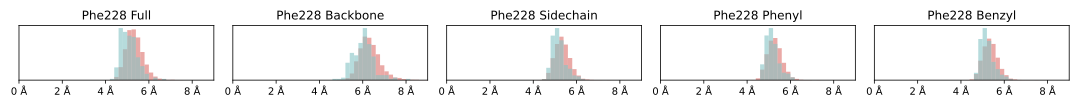

6-RING


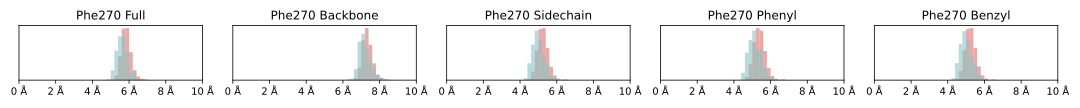

PHENOXY


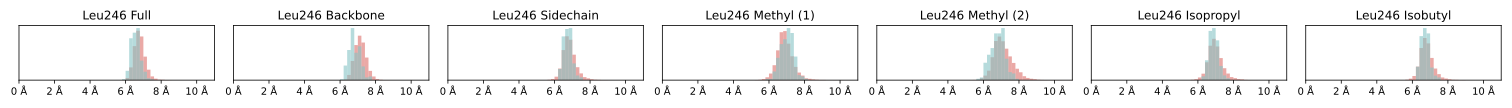

PHENOXY


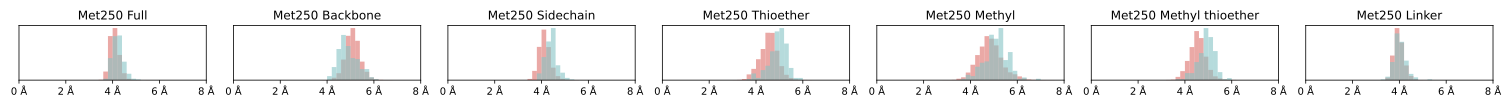

PHENOXY


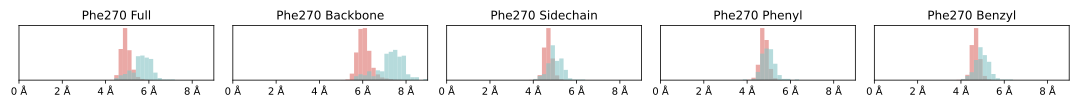

5-RING


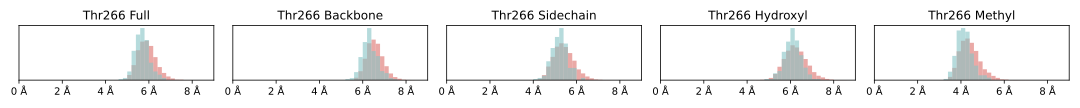

5-RING


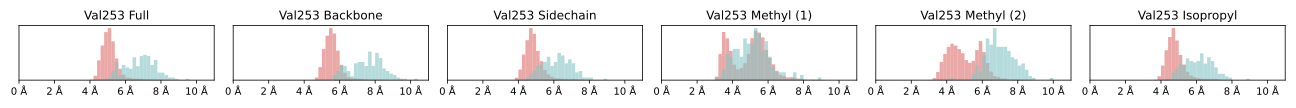

In [28]:
# Checking substructure distance distributions
svg_files = glob.glob(os.path.join(plotdir, '**/substructure_distances_*.svg'), recursive=True)
for file in svg_files:
    print(file.split('/')[-1].split('_')[2].upper())
    display(SVG(filename=file))

In [2]:
# Jensen-Shannon distance plots for candidate substructures

# Looping over all probes
for ligand_substructure in distance_probes:
    print(ligand_substructure)

    plot_residues_substructure_com_distance_divergence(
        mm_complex,
        ml_complex,
        "protein and resid " + ' '.join([res[3:] for res in distance_probes[ligand_substructure]['residues']]),
        distance_probes[ligand_substructure]['ligand_query'],
        save_to=os.path.join(distance_plotdir, 'ligand_'+ligand_substructure, f'jensen-shannon-distance_{ligand_substructure}.svg'),
        scatter=True,
        save_scatter_to=os.path.join(distance_plotdir, 'ligand_'+ligand_substructure, f'jensen-shannon-distance_scatter_{ligand_substructure}.svg')
    )

NameError: name 'distance_probes' is not defined

### 3.3 Probe refinement

  0%|          | 0/10001 [00:00<?, ?it/s]

100%|██████████| 196/196 [00:00<00:00, 681.78it/s]


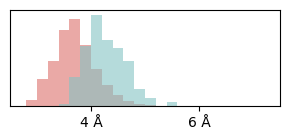

100%|██████████| 196/196 [00:00<00:00, 722.49it/s]


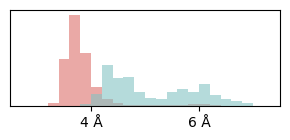

In [18]:
# Acid - Arg263 - Guanidinyl
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 263",
    distance_probes['acid']['ligand_query'],
    xlims=(2.5,7.5),
    save_to=os.path.join(distance_plotdir, 'ligand_acid', 'arg263', 'distance_acid_arg263.svg')
)

plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 263" + " and " + residue_substructure_queries['ARG']['Guanidinyl'],
    distance_probes['acid']['ligand_query'],
    xlims=(2.5,7.5),
    save_to=os.path.join(distance_plotdir, 'ligand_acid', 'arg263', 'distance_acid_arg263_guanidinyl.svg')
)

100%|██████████| 196/196 [00:00<00:00, 651.26it/s]


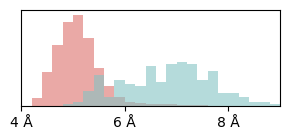

100%|██████████| 196/196 [00:00<00:00, 671.08it/s]


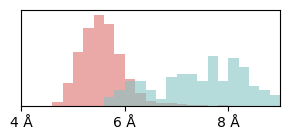

In [19]:
# 5-ring benzothiopene - Val253 - Backbone
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 253",
    distance_probes['5-ring_benzothiopene']['ligand_query'],
    xlims=(4,9),
    save_to=os.path.join(distance_plotdir, 'ligand_5-ring_benzothiopene', 'val253', 'distance_ligand_5-ring_benzothiopene_val253.svg')
)

plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 253" + " and " + residue_substructure_queries['VAL']['Backbone'],
    distance_probes['5-ring_benzothiopene']['ligand_query'],
    xlims=(4,9),
    save_to=os.path.join(distance_plotdir, 'ligand_5-ring_benzothiopene', 'val253', 'distance_ligand_5-ring_benzothiopene_val253_backbone.svg')
)

100%|██████████| 196/196 [00:00<00:00, 717.76it/s]


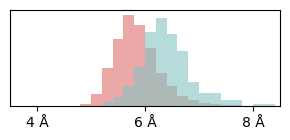

100%|██████████| 196/196 [00:00<00:00, 699.41it/s]


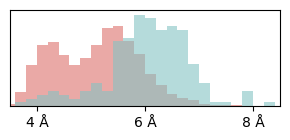

In [20]:
# 6-ring benzothiopene - Met231 - Methyl thioether
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 231",
    distance_probes['6-ring_benzothiopene']['ligand_query'],
    xlims=(3.5,8.5),
    save_to=os.path.join(distance_plotdir, 'ligand_6-ring_benzothiopene', 'met231', 'distance_ligand_6-ring_benzothiopene_met231.svg')
)

plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 231" + " and " + residue_substructure_queries['MET']['Methyl thioether'],
    distance_probes['6-ring_benzothiopene']['ligand_query'],
    xlims=(3.5,8.5),
    save_to=os.path.join(distance_plotdir, 'ligand_6-ring_benzothiopene', 'met231', 'distance_ligand_6-ring_benzothiopene_met231_methylthioether.svg')
)

  0%|          | 0/10001 [00:00<?, ?it/s]

100%|██████████| 196/196 [00:00<00:00, 924.89it/s]


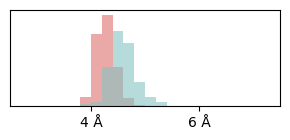

100%|██████████| 196/196 [00:00<00:00, 808.06it/s]


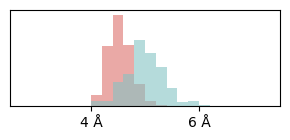

In [34]:
# Linker - Leu267 - Backbone
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 267",
    distance_probes['linker']['ligand_query'],
    xlims=(2.5,7.5),
    save_to=os.path.join(distance_plotdir, 'ligand_linker', 'leu267', 'distance_ligand_linker_leu267.svg')
)

plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 267" + " and " + residue_substructure_queries['LEU']['Backbone'],
    distance_probes['linker']['ligand_query'],
    xlims=(2.5,7.5),
    save_to=os.path.join(distance_plotdir, 'ligand_linker', 'leu267', 'distance_ligand_linker_leu267_backbone.svg')
)

In [ ]:
# Phenoxy ring - Phe270 - Backbone
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 270",
    distance_probes['phenoxy']['ligand_query'],
    xlims=(4,9),
    save_to=os.path.join(distance_plotdir, 'ligand_phenoxy', 'phe270', 'distance_ligand_phenoxy_phe270.svg')
)

plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 270" + " and " + residue_substructure_queries['PHE']['Backbone'],
    distance_probes['phenoxy']['ligand_query'],
    xlims=(4,9),
    save_to=os.path.join(distance_plotdir, 'ligand_phenoxy', 'phe270', 'distance_ligand_phenoxy_phe270_backbone.svg')
)

  0%|          | 0/10001 [00:00<?, ?it/s]

100%|██████████| 196/196 [00:00<00:00, 667.98it/s]


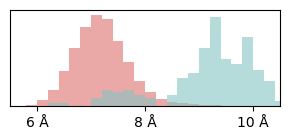

In [29]:
# Chloride - Leu290 - All
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 290",
    distance_probes['chloride']['ligand_query'],
    xlims=(5.5,10.5),
    save_to=os.path.join(distance_plotdir, 'ligand_chloride', 'leu290', 'distance_ligand_chloride_leu290.svg')
)

100%|██████████| 196/196 [00:00<00:00, 484.28it/s]


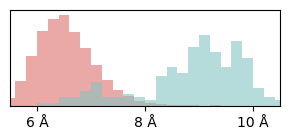

In [28]:
# Chloride - Val274 - All
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    "protein and resid 274",
    distance_probes['chloride']['ligand_query'],
    xlims=(5.5,10.5),
    save_to=os.path.join(distance_plotdir, 'ligand_chloride', 'val274', 'distance_ligand_chloride_val274.svg')
)

## 4. Orientation distributions

In [7]:
# Initalizing directory for orientation probe plots
orientation_plotdir = os.path.join(plotdir, 'orientation_probes')
os.makedirs(orientation_plotdir, exist_ok=True)

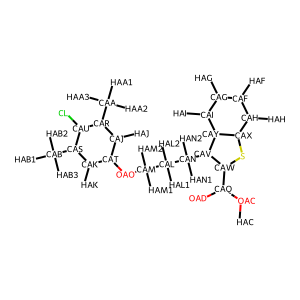

In [5]:
print_atom_names(mm_complex, 'resname 19G')

### 4.1 Pi stacking

#### 4.1.1 Distances

  0%|          | 0/10001 [00:00<?, ?it/s]

100%|██████████| 196/196 [00:00<00:00, 1036.73it/s]


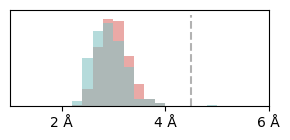

In [ ]:
# Phe270 carbons - 6-ring of benzothiopene terminal hydrogen
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    'protein and resid 270 and name CG CD1 CD2 CE1 CE2 CZ',
    'resname 19G and name HAG',
    xlims=(1,6)
)
plt.vlines([4.5], *plt.ylim(), ls='--', color='black', alpha=0.3)

100%|██████████| 196/196 [00:00<00:00, 1029.12it/s]


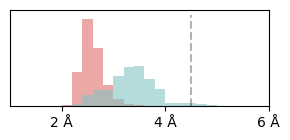

In [ ]:
# Phe270 ortho hydrogen - Ligand phenoxy carbons
plot_com_distance_distributions(
    mm_complex,
    ml_complex,
    'protein and resid 270 and name HD2',
    'resname 19G and name CAT CAK CAS CAU CAR CAJ',
    xlims=(1,6)
)
plt.vlines([4.5], *plt.ylim(), ls='--', color='black', alpha=0.3)


#### 4.1.2 Orientations

100%|██████████| 196/196 [00:00<00:00, 784.54it/s]


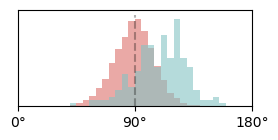

In [8]:
# Phe270 phenyl plane - Ligand benzothiopene 6-ring plane
phe_benz_angles = plot_plane_angle_distributions(
    mm_complex,
    ml_complex,
    'protein and resid 270 and name CG CE1 CE2',
    'resname 19G and name CAY CAG CAH'
)
plt.vlines([-90,90], *plt.ylim(), ls='--', color='black', alpha=0.3)
plt.xlim(0,180)
plt.savefig(orientation_plotdir+"/phe270_6-ring_benzothiopene_planar_angle.svg")

100%|██████████| 196/196 [00:00<00:00, 702.99it/s]


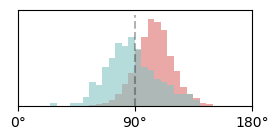

In [9]:
# Phe270 phenyl plane - Ligand phenoxy plane
plot_plane_angle_distributions(
    mm_complex,
    ml_complex,
    'protein and resid 270 and name CG CE1 CE2',
    'resname 19G and name CAT CAS CAR'
)
plt.vlines([-90,90], *plt.ylim(), ls='--', color='black', alpha=0.3)
plt.xlim(0,180)
plt.savefig(orientation_plotdir+"/phe270_6-ring_phenoxy_angle.svg")

100%|██████████| 196/196 [00:00<00:00, 880.61it/s]


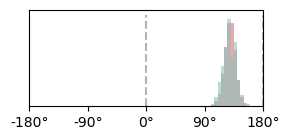

In [13]:
# Ligand benzothiopene 6-ring plane - Ligand phenoxy plane
plot_plane_angle_distributions(
    mm_complex,
    ml_complex,
    'resname 19G and name CAY CAH CAG',
    'resname 19G and name CAT CAS CAR'
)
plt.vlines([-180, 0, 180], *plt.ylim(), ls='--', color='black', alpha=0.3)

## 5. Representative structures

In [51]:
# Initializing directory for representative structures
structuredir = '../structures/4hw3'
os.makedirs(structuredir, exist_ok=True)

In [ ]:
# Selecting representative frames based on pi stacking angle
save_representative_frame(mm_complex,
                          phe_benz_angles['mm_complex'],
                          phe_benz_angles['mm_complex'].mean(),
                          save_to=structuredir+'/pi_stacking_mm.pdb')
save_representative_frame(mm_complex,
                          phe_benz_angles['ml_complex'],
                          phe_benz_angles['ml_complex'].mean(),
                          save_to=structuredir+'/pi_stacking_ml.pdb')

ChimeraX commands to produce movies
```
# Navigating to directory
cd "[...]/mm_ml_analysis/structures/4hw3"

# Opening structures
open pi_stacking_mm.pdb
open pi_stacking_ml.pdb

# Colouring models accordingly
color #1 #dc706bff
color #2 #85c3c4
color byhetero

# Aligning by residues near ligand
match #1:253,231,263,267,270,274,290 to #2:253,231,263,267,270,274,290

# Hide solvent
hide solvent | ions

# Starting labelling from scratch
hide protein atoms
transparency protein 70 cartoon

# Labelling all contacts slightly
contacts :19G select true makePseudobonds false
select subtract solvent
select up
select subtract @H* | :19G
show sel atoms
transparency sel 80 atoms
label sel & #1 font "Poppins" color "light gray"

# Labelling select contacts boldly
select :253,231,263,267,270,274,290 & protein & ~@H*
show sel atoms
transparency sel 0 atoms
label sel & #1 font "Poppins" color "black"

# Setting display settings
set bgColor white
lighting soft
view :19G
select clear

# Set pivot point on ether oxygen
cofr @OAO

# Make movies
# [Manually select an initial view to rotate from here]
movie record; turn y 2 180; wait 180; turn x 2 180; wait 180; movie encode yx-spin.mp4
```

Converting .MP4 to .GIF with `ffmpeg`
```
ffmpeg -i yx-spin.mp4 -vf "fps=30" yx-spin.gif
```